## Volatility

* Different ways to look at it
* Here we wil use: Average True Range (ATR)

##### What is volatility?

* Volatility has a number of different meanings
* We use it in relation to price movement
* Can be thought as the equivalent as risk

##### Resources

* Volatility: https://www.investopedia.com/terms/v/volatility.asp
* Average True Range: https://www.investopedia.com/terms/a/atr.asp

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader as pdr

In [3]:
start = dt.datetime(2022,1,1)
data = pdr.get_data_stooq("NFLX", start)

In [5]:
data = data[::-1]

In [6]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,605.61,609.9900,590.5600,597.37,3068808
2022-01-04,599.91,600.4099,581.6000,591.15,4393135
2022-01-05,592.00,592.8400,566.8800,567.52,4148749
2022-01-06,554.34,563.3600,542.0100,553.29,5711795
2022-01-07,549.46,553.4300,538.2175,541.06,3382873


##### Formula

![alt text](FormulaVolatility.png)

In [9]:
high_low = data["High"] - data["Low"]
high_cp = np.abs(data["High"] - data["Close"].shift())
low_cp = np.abs(data["Low"] - data["Close"].shift())

In [14]:
df = pd.concat([high_low, high_cp, low_cp],axis=1)
df


,0,1,2
Date,,,
2022-01-03,19.4300,NaN,NaN
2022-01-04,18.8099,3.0399,15.7700
2022-01-05,25.9600,1.6900,24.2700
2022-01-06,21.3500,4.1600,25.5100
2022-01-07,15.2125,0.1400,15.0725
...,...,...,...
2023-03-08,6.0800,3.3600,2.7200
2023-03-09,17.6300,0.7200,16.9100
2023-03-10,9.7900,1.0100,8.7800


In [15]:
true_range = np.max(df, axis = 1)
true_range

Date
2022-01-03    19.4300
2022-01-04    18.8099
2022-01-05    25.9600
2022-01-06    25.5100
2022-01-07    15.2125
               ...   
2023-03-08     6.0800
2023-03-09    17.6300
2023-03-10     9.7900
2023-03-13    13.9099
2023-03-14     7.1400
Length: 300, dtype: float64

In [19]:
average_true_range = true_range.rolling(14).mean()
average_true_range

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
                ...    
2023-03-08    10.029893
2023-03-09    10.489893
2023-03-10    10.598464
2023-03-13    10.767579
2023-03-14    10.628293
Length: 300, dtype: float64

In [18]:
true_range.rolling(14).sum()/14

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
                ...    
2023-03-08    10.029893
2023-03-09    10.489893
2023-03-10    10.598464
2023-03-13    10.767579
2023-03-14    10.628293
Length: 300, dtype: float64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Price')

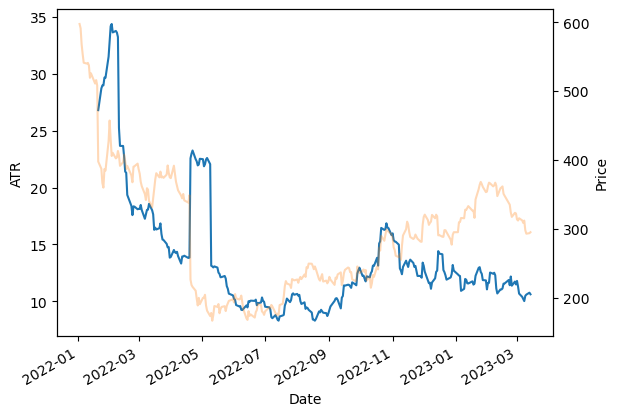

In [26]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")